# Creating Quantum Circuits

Quantum Circuit is a collection of qubits and a list of instructions that act on those qubits.

## Simple Circuits

In [1]:
#Initialization
from qiskit import QuantumCircuit
import matplotlib as plt

In [2]:
qc=QuantumCircuit(2) #Creates Quantum circuit with two qubits

In [3]:
qc.x(0) #Added x-gate to qubit 0

In [4]:
qc.h(1) #To add HGate or Hadamard gate to qubit 1

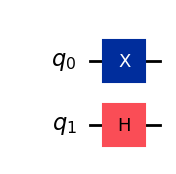

In [5]:
qc.draw("mpl")

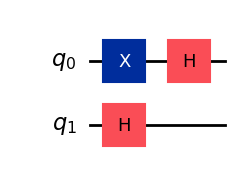

In [6]:
# Add gates using 'append' function as well
from qiskit.circuit.library import HGate #importing gate from library
qc.append(HGate(),[0]) #adding H gate to qubit 0
qc.draw("mpl")

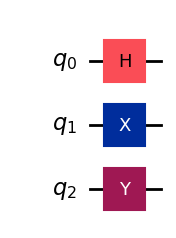

In [8]:
#To combine two or more circuits to create a new circuit, use "compose"
#Circuit 1
qc_a = QuantumCircuit(3)
qc_a.h(0)
#cirucit 2
qc_b = QuantumCircuit(2)
qc_b.x(0)
qc_b.y(1)
#combined circuit: implementing qc_b circuit to 1 and 2 qubits of qc_a
combine_qc = qc_a.compose(qc_b,qubits = [1,2])
combine_qc.draw("mpl")


To reveal each gate into basis gates, use "decompose" function

In [11]:
#As the standard gates are reversible unitary gates, we can write their matrix representations
from qiskit.circuit.library import ZGate
gate = ZGate()
#to print the gate as a unitary matrix
print(gate.to_matrix())
#To create a square root of matrix operator 
print(gate.power(1/2).to_matrix())

[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]
[[1.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 6.123234e-17+1.j]]


## Paramterized Circuits

Parameterized circuits are the circuits with undefined parameters. 

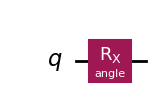

In [10]:
from qiskit.circuit import Parameter

angle = Parameter("angle") #undefined parameter

qc = QuantumCircuit(1) # creating a quantum circuit with one qubit
qc.rx(angle,0) #applying a "rotation around x-axis(rx)" gate to qubit 0

qc.draw("mpl")

## 1-qubit gates

These are the standard gates that act on 1 qubit only. Some of the important ones are X, Y, Z, I, H, and so on. As these gates act on single qubit, they are of 2x2 matrices in matrix representation.

Hgate matrix= [[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]
Igate matrix= [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


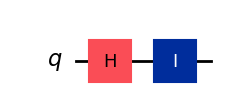

In [20]:
from qiskit.circuit.library import IGate
qc = QuantumCircuit(1)
#H gate (hadamard gate)
qc.h(0)
print("Hgate matrix=",HGate().to_matrix())

#IGate (identity)
qc.id(0)
print("Igate matrix=",IGate().to_matrix())

qc.draw("mpl")

Similarly, one can implement any other gates. Some of other important ones are 

Basic gates: I, X, Y, Z, H where X,Y and Z gates are usual Pauli matrices

Rotation gates: Phasegate, Rgate, RXgate, RYgate, RZgate, UGate where all the rotation gates are limitations of Ugate

Other gates: Sgate, SXgate, Tgate (these are obtained from basic gates)

## 2-qubit gates

In the case of 2-qubit gates, they are represented by 4x4 matrices. Most of the 2-qubit gates are controlled gates. In case of these gates, an operation will occur on 2nd qubit iff 1st qubit is 1. Some of such gates are CHGate, CPhasegate, CRXgate, and so on.

In [25]:
from qiskit.quantum_info import Operator
qc = QuantumCircuit(2) 
qc.ch(0,1) #Applying CHGate with control on qubit 0 and target is qubit 1.
qc.draw("mpl")

#to see matrix representation, one has to use Operator class (explained in other file)
unitary = Operator(qc)

print(unitary.data)

[[ 1.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        +0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  1.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        +0.j -0.70710678+0.j]]


There are also other gates such as DCXGate (double CNOT gate), ECRgate, Swapgate, which are inherent 2-qubit gates.

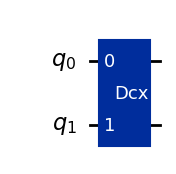

In [7]:
from qiskit.circuit.library import DCXGate, SwapGate

qc = QuantumCircuit(2)
qc.dcx(0,1)

qc.draw("mpl")

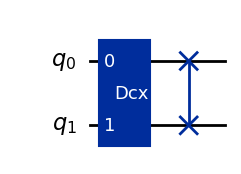

In [8]:
#To implement swap gate, it looks like below
qc.swap(0,1)
qc.draw("mpl")

There are also rotation gates implemented over all XX, XY, and so on, operators. Some of them are RXXGate, RYYGate, RZXGate, RZZGate, and so on.

## 3-qubit or more standard gates

In higher qubit cases, most of the gates are same as 2-qubit gates which are controlled gates (different combinations), swapgates, and rotation gates.

Some of the important ones are Toffoli gate or CCXGate (double controlled X gate), Fredkin gate or controlled swap gate, and Simplified Toffoli gate or margolus gate or RCCXgate.

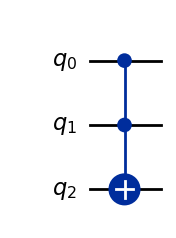

In [9]:
from qiskit.circuit.library import CCXGate

qc = QuantumCircuit(3)

qc.ccx(0,1,2)
qc.draw("mpl")